<a href="https://colab.research.google.com/github/PTHC4231/Datathon-2023/blob/main/PTB_XL_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import wfdb
import ast
from tqdm import tqdm
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_hr)]
    data = np.array([signal for signal, meta in data])
    return data


In [ ]:
path = 'C:/Users/Owner/Downloads/ptb-xl/ptb-xl/'
sampling_rate=100

In [ ]:
# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 21799/21799 [04:31<00:00, 80.42it/s]


In [ ]:
print('data shpae:', X.shape)
Y[['scp_codes']]
Y

# Data shape should be 21837 - some are missing??

data shpae: (21799, 1000, 12)


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [ ]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]
print(agg_df.shape)
agg_df.head()

(44, 12)


,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
def aggregate_supclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']
# Length in og is 5158, not 5144

ecg_id
39       [STTC, MI]
45        [CD, HYP]
50         [CD, MI]
77         [CD, MI]
87       [STTC, CD]
            ...    
21815      [CD, MI]
21821    [CD, NORM]
21827    [STTC, MI]
21828    [STTC, MI]
21829    [CD, NORM]
Name: diagnostic_superclass, Length: 5144, dtype: object

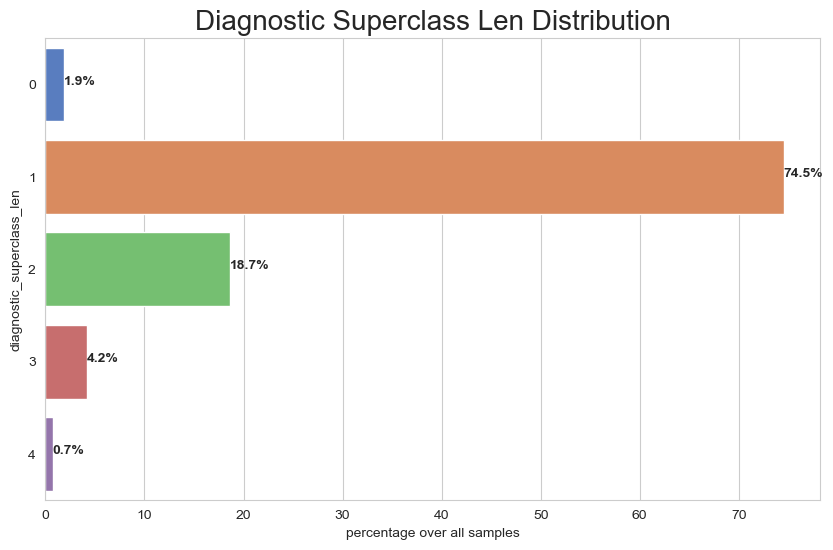

In [ ]:
vc = Y['diagnostic_superclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_superclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )


In [ ]:
def aggregate_subclass_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))
    ret = ['sub_'+r for r in ret] # to distinguish between subclass and superclass columns
    return ret

# Apply diagnostic subclass
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

ecg_id
26                    [sub_NST_, sub_STTC]
28                    [sub_NST_, sub_STTC]
39           [sub_STTC, sub_NST_, sub_IMI]
45       [sub_IRBBB, sub_RVH, sub_RAO/RAE]
50                     [sub_IVCD, sub_LMI]
                       ...                
21821                [sub_IRBBB, sub_NORM]
21827                  [sub_IMI, sub_ISCA]
21828                  [sub_IMI, sub_ISCA]
21829                [sub_IRBBB, sub_NORM]
21832            [sub_IVCD, sub_LAFB/LPFB]
Name: diagnostic_subclass, Length: 6177, dtype: object

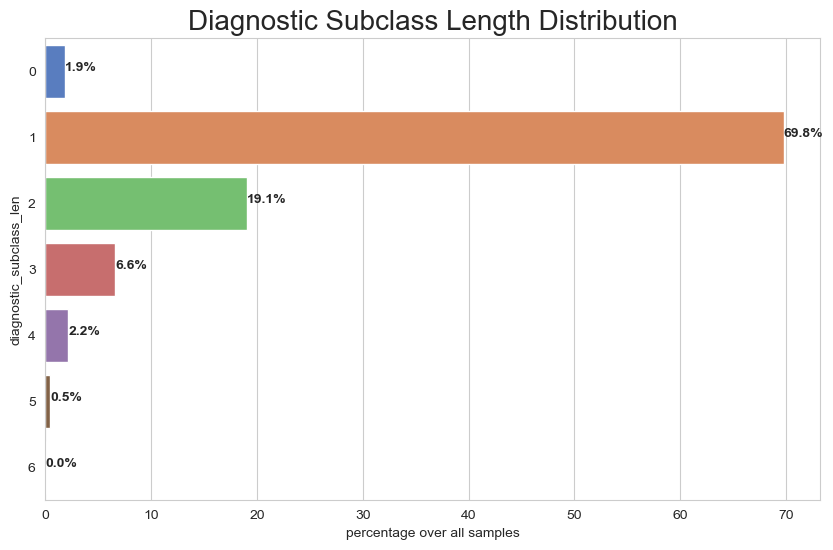

In [ ]:
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [ ]:
Y.columns.tolist()

['patient_id',
 'age',
 'sex',
 'height',
 'weight',
 'nurse',
 'site',
 'device',
 'recording_date',
 'report',
 'scp_codes',
 'heart_axis',
 'infarction_stadium1',
 'infarction_stadium2',
 'validated_by',
 'second_opinion',
 'initial_autogenerated_report',
 'validated_by_human',
 'baseline_drift',
 'static_noise',
 'burst_noise',
 'electrodes_problems',
 'extra_beats',
 'pacemaker',
 'strat_fold',
 'filename_lr',
 'filename_hr',
 'diagnostic_superclass',
 'diagnostic_superclass_len',
 'diagnostic_subclass',
 'diagnostic_subclass_len']

In [ ]:
all_superclass = pd.Series(np.concatenate(Y['diagnostic_superclass'].values))
all_subclass = pd.Series(np.concatenate(Y['diagnostic_subclass'].values))
superclass_cols = all_superclass.unique()
subclass_cols = all_subclass.unique()
update_cols = np.concatenate([superclass_cols, subclass_cols]) # add meta data columns
meta_cols = ['age', 'sex', 'height', 'weight', 'nurse', 'site', 'device',] # could add more columns as features

In [ ]:
class ClassUpdate():
    def __init__(self, cols):
        self.cols = cols

    def __call__(self, row):
        for sc in row['diagnostic_superclass']:
            row[sc] = 1
        for sc in row['diagnostic_subclass']:
            row[sc] = 1

        return row

def get_data_by_folds(folds, x, y, update_cols, feature_cols):
    assert len(folds)  > 0, '# of provided folds should longer than 1'
    #print(y.strat_fold)
    filt = np.isin(y.strat_fold.values, folds)
    x_selected = x[filt]
    y_selected = y[filt]

    for sc in update_cols:
        y_selected[sc] = 0

    cls_updt = ClassUpdate(update_cols)

    y_selected = y_selected.apply(cls_updt, axis=1)

    return x_selected, y_selected[list(feature_cols)+list(update_cols)+['strat_fold']]

In [ ]:
x_all, y_all = get_data_by_folds(np.arange(1, 11), X, Y, update_cols, meta_cols)

In [ ]:
y_all

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4
21835,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,2


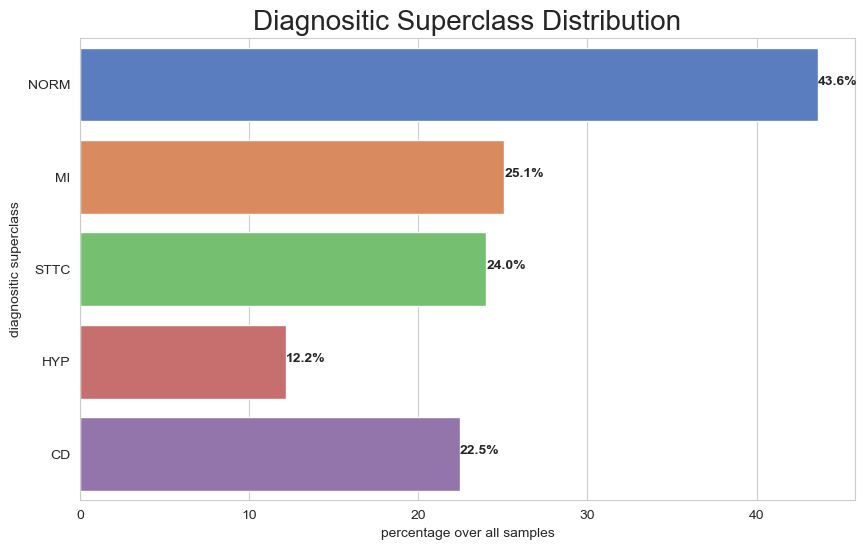

In [ ]:
vc = y_all[superclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Superclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic superclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

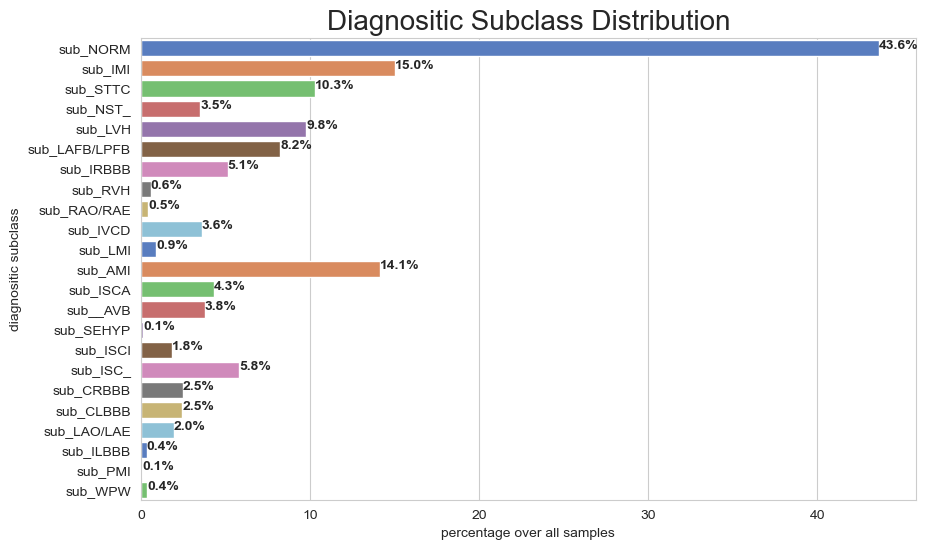

In [ ]:
vc = y_all[subclass_cols].sum(axis=0)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
ax.set_title("Diagnositic Subclass Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnositic subclass")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

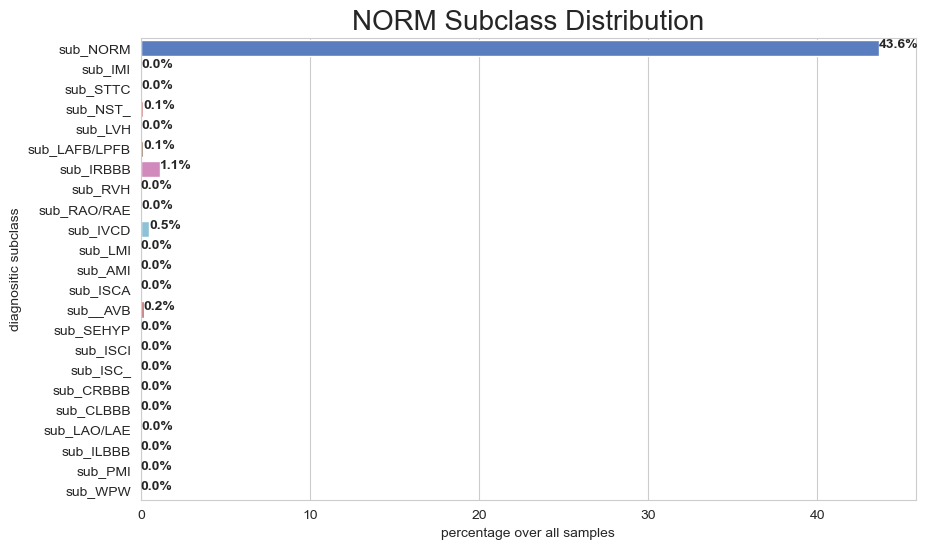

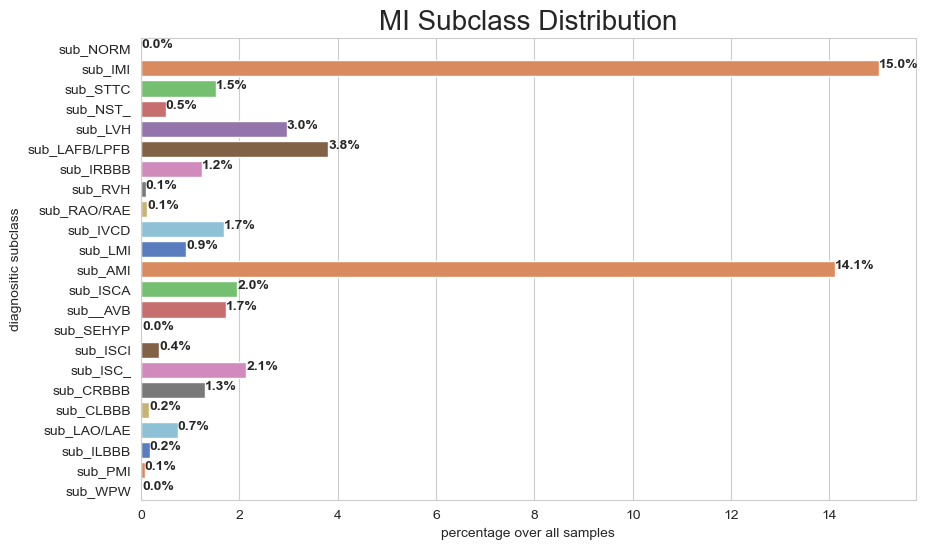

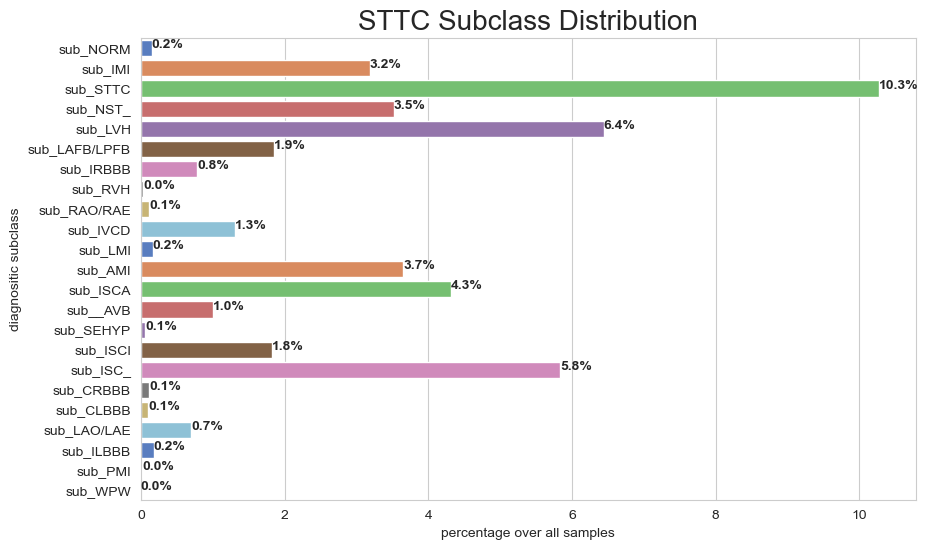

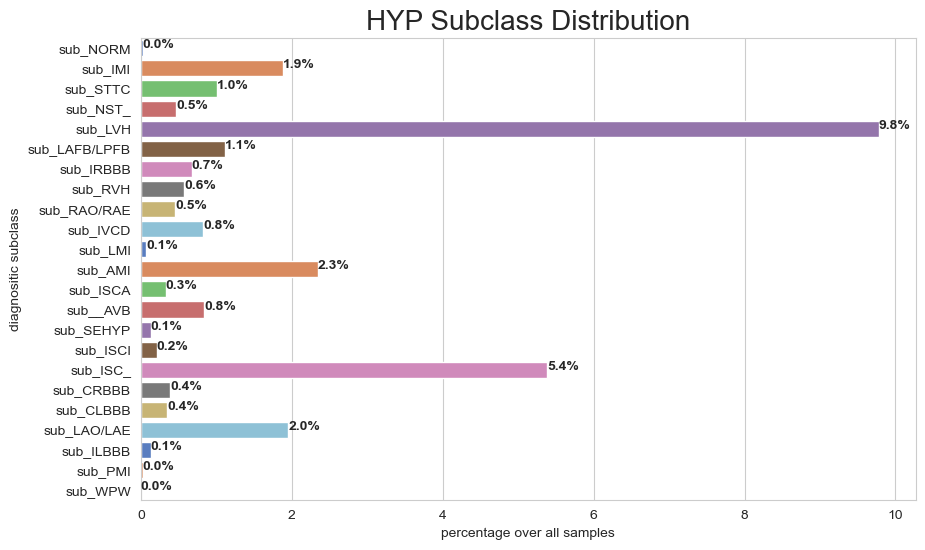

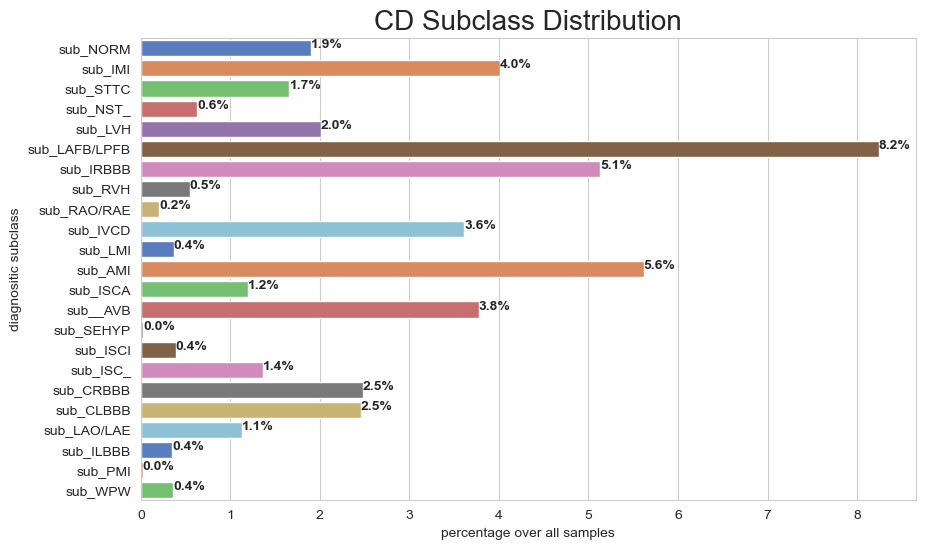

In [ ]:
for superclass in superclass_cols:

    vc = y_all.loc[y_all[superclass] == 1][subclass_cols].sum(axis=0)

    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=vc.values/y_all.shape[0]*100., y=vc.index, ci=None, palette="muted",orient='h' )
    ax.set_title("{} Subclass Distribution".format(superclass), fontsize=20)
    ax.set_xlabel ("percentage over all samples")
    ax.set_ylabel ("diagnositic subclass")
    for rect in ax.patches:
        ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

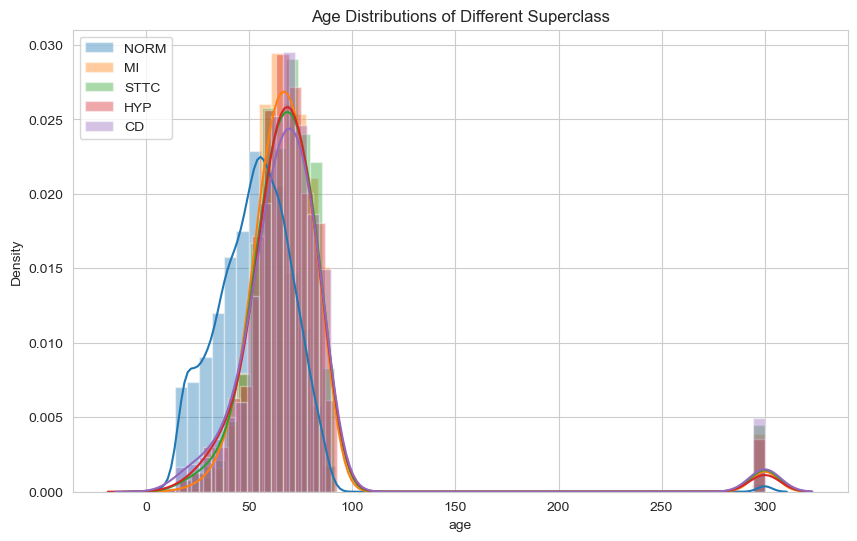

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Age Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1]['age']
    sns.distplot(data, label=superclass)


plt.legend(loc='upper left')
plt.show()
#above 89 is denoted as 300

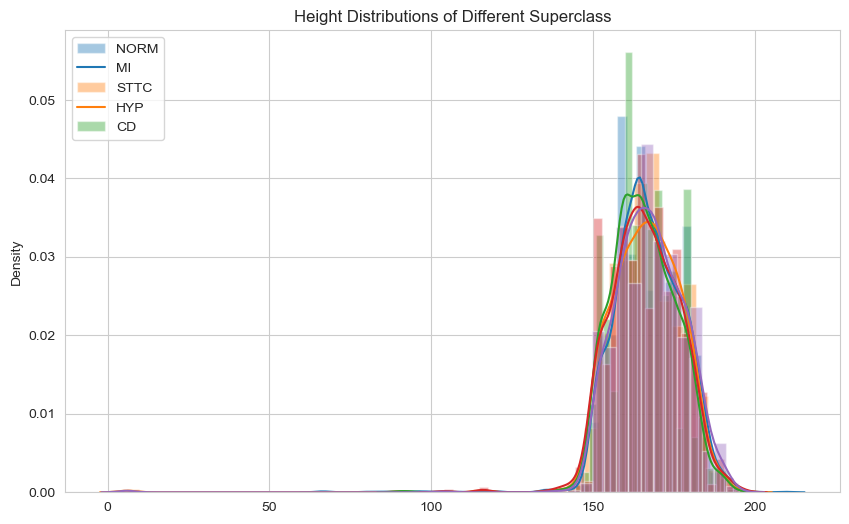

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Height Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['height']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

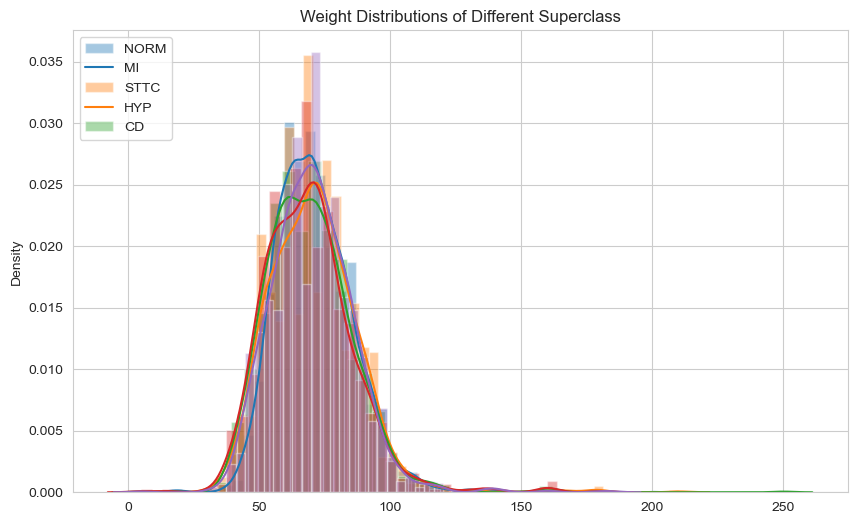

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('Weight Distributions of Different Superclass')

for superclass in superclass_cols:
    data = y_all.loc[y_all[superclass] == 1][['weight']]
    sns.distplot(data, label=superclass)

plt.legend(labels=superclass_cols, loc='upper left')
plt.show()

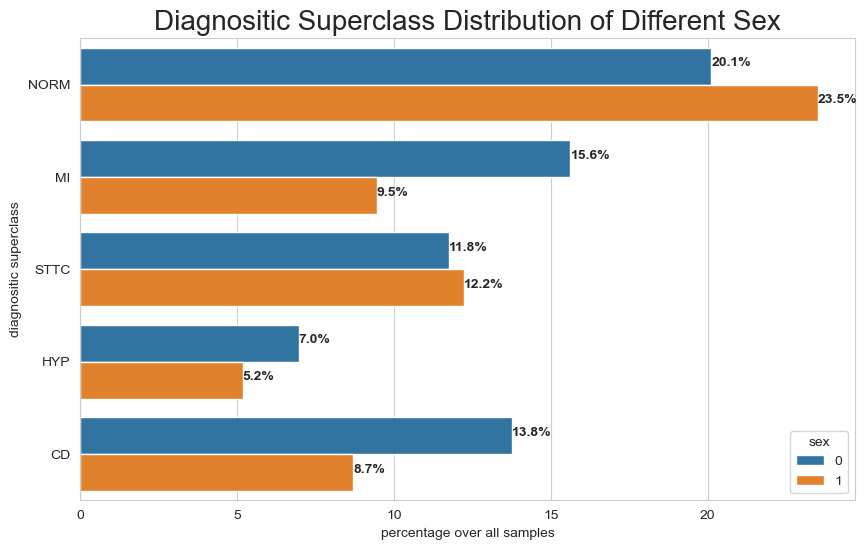

In [ ]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))

ax.set_title("Diagnositic Superclass Distribution of Different Sex", fontsize=20)

all_index, all_count, all_values = [], [], []
for sex in y_all.sex.unique():
    vc = y_all.loc[y_all.sex == sex][superclass_cols].sum(axis=0)
    all_index += list(vc.index)
    all_count += list(vc.values/y_all.shape[0]*100.)
    all_values += [sex]*len(vc)
    #print(all_sex)

df = pd.DataFrame()
df['diagnositic superclass'] = all_index
df['percentage over all samples'] = all_count
df['sex'] = all_values

ax = sns.barplot(data=df, x="percentage over all samples", y="diagnositic superclass", hue="sex",ci=None, orient='h')
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold')

In [ ]:
x_train, y_train = get_data_by_folds(np.arange(1, 9), X, Y, update_cols, meta_cols)
print('data shape', x_train.shape)
y_train

data shape (17418, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [ ]:
x_valid, y_valid = get_data_by_folds([9], X, Y, update_cols, meta_cols)
print('data shape', x_valid.shape)
y_valid

data shape (2183, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
x_test, y_test = get_data_by_folds([10], X, Y, update_cols, meta_cols)
print('data shape', x_test.shape)
y_test

data shape (2198, 1000, 12)


,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
9,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
38,40.0,0,NaN,72.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
40,60.0,0,NaN,85.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
57,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
59,54.0,0,NaN,67.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21809,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10
21812,67.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,1,0,0,0,0,0,10
21818,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,10


In [ ]:
id_cols = ['ecg_id']
channel_cols = ['channel-{}'.format(i) for i in range(12)]

y_train.to_csv('train_meta.csv', index=True)
y_train_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_train.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_train.index.values):
    y_train_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_train_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_train[i,:,:]

y_train_signal['ecg_id'] = y_train_signal['ecg_id'].astype(np.int)
y_train_signal.to_csv('train_signal.csv', index=False)

display(y_train)
display(y_train_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,5
4,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,3
5,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,63.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,7
21833,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,0,1,...,0,0,0,0,0,0,0,0,0,7
21834,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,4


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,1,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,1,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,1,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,1,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17417995,21836,0.096,0.189,0.093,-0.143,0.001,0.141,-0.034,0.189,0.162,0.227,0.183,0.128
17417996,21836,0.051,0.119,0.068,-0.085,-0.009,0.093,-0.049,0.195,0.172,0.217,0.127,0.081
17417997,21836,0.033,0.070,0.037,-0.052,-0.002,0.054,-0.097,0.140,0.215,0.218,0.101,0.052
17417998,21836,0.027,0.082,0.055,-0.055,-0.014,0.068,-0.104,0.123,0.200,0.210,0.335,0.010


In [ ]:
y_valid.to_csv('valid_meta.csv', index=True)
y_valid_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_valid.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_valid.index.values):
    y_valid_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_valid_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_valid[i,:,:]

y_valid_signal['ecg_id'] = y_valid_signal['ecg_id'].astype(np.int)
y_valid_signal.to_csv('valid_signal.csv', index=False)

display(y_valid)
display(y_valid_signal)

,age,sex,height,weight,nurse,site,device,NORM,MI,STTC,...,sub_SEHYP,sub_ISCI,sub_ISC_,sub_CRBBB,sub_CLBBB,sub_LAO/LAE,sub_ILBBB,sub_PMI,sub_WPW,strat_fold
ecg_id,,,,,,,,,,,,,,,,,,,,,
8,48.0,0,NaN,95.0,2.0,0.0,CS-12 E,0,1,0,...,0,0,0,0,0,0,0,0,0,9
10,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1,0,0,...,0,0,0,0,0,0,0,0,0,9
17,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
18,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
20,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,1,0,0,...,0,0,0,0,0,0,0,0,0,9
21788,72.0,1,NaN,NaN,1.0,2.0,AT-60 3,0,1,0,...,0,0,0,0,0,0,0,0,0,9
21817,66.0,0,NaN,NaN,1.0,2.0,AT-60 3,0,0,0,...,0,0,0,0,0,0,0,0,0,9


,ecg_id,channel-0,channel-1,channel-2,channel-3,channel-4,channel-5,channel-6,channel-7,channel-8,channel-9,channel-10,channel-11
0,8,-0.041,-0.080,-0.039,0.060,-0.001,-0.060,0.045,-0.005,0.005,-0.055,-0.070,-0.040
1,8,-0.039,-0.076,-0.037,0.058,-0.001,-0.057,0.045,-0.007,0.001,-0.055,-0.070,-0.040
2,8,-0.018,-0.069,-0.051,0.043,0.017,-0.059,0.045,-0.013,-0.006,-0.055,-0.073,-0.045
3,8,-0.013,-0.063,-0.050,0.038,0.019,-0.056,0.045,-0.016,-0.012,-0.058,-0.077,-0.049
4,8,-0.020,-0.055,-0.034,0.038,0.007,-0.044,0.045,-0.021,-0.019,-0.062,-0.079,-0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182995,21837,-0.024,-0.016,0.008,0.019,-0.016,-0.003,0.069,0.135,0.073,0.024,-0.012,-0.044
2182996,21837,0.000,-0.001,-0.002,0.001,0.001,-0.001,0.071,0.148,0.082,0.034,-0.009,-0.085
2182997,21837,0.091,0.012,-0.079,-0.051,0.085,-0.034,0.069,0.199,0.120,0.063,0.016,-0.117
2182998,21837,0.175,0.022,-0.153,-0.099,0.164,-0.065,0.070,0.244,0.148,0.080,0.018,-0.108


In [ ]:
y_test.to_csv('test_meta.csv', index=True)
y_test_signal = pd.DataFrame(columns=id_cols+channel_cols, index=np.arange(y_test.shape[0]*1000), dtype=np.float32)

ecg_ids = []
signals = []
for i, ecg_id in enumerate(y_test.index.values):
    y_test_signal.loc[i*1000:(i+1)*1000-1, 'ecg_id'] = [ecg_id]*1000
    y_test_signal.loc[i*1000:(i+1)*1000-1, channel_cols] = x_test[i,:,:]

y_test_signal['ecg_id'] = y_test_signal['ecg_id'].astype(np.int)
y_test_signal.to_csv('test_signal.csv', index=False)

display(y_test)
display(y_test_signal)

NameError: ignored